# Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

In [2]:
files = os.listdir('archive')

for file in files:
    print(file)

comments.csv
videos-stats.csv


In [3]:
comments_df = pd.read_csv('archive/comments.csv')
videos_df = pd.read_csv('archive/videos-stats.csv')

In [4]:
# Basic information about comments dataset
print("=== COMMENTS DATASET ===")
print("\nShape:", comments_df.shape)
print("\nColumns:", list(comments_df.columns))
print("\nData Types:")
print(comments_df.dtypes)
print("\nFirst few rows:")
print(comments_df.head())
print("\nMissing values:")
print(comments_df.isnull().sum())
print("\n" + "="*50 + "\n")

=== COMMENTS DATASET ===

Shape: (18409, 5)

Columns: ['Unnamed: 0', 'Video ID', 'Comment', 'Likes', 'Sentiment']

Data Types:
Unnamed: 0      int64
Video ID       object
Comment        object
Likes         float64
Sentiment     float64
dtype: object

First few rows:
   Unnamed: 0     Video ID                                            Comment  \
0           0  wAZZ-UWGVHI  Let's not forget that Apple Pay in 2014 requir...   
1           1  wAZZ-UWGVHI  Here in NZ 50% of retailers don’t even have co...   
2           2  wAZZ-UWGVHI  I will forever acknowledge this channel with t...   
3           3  wAZZ-UWGVHI  Whenever I go to a place that doesn’t take App...   
4           4  wAZZ-UWGVHI  Apple Pay is so convenient, secure, and easy t...   

   Likes  Sentiment  
0   95.0        1.0  
1   19.0        0.0  
2  161.0        2.0  
3    8.0        0.0  
4   34.0        2.0  

Missing values:
Unnamed: 0    0
Video ID      0
Comment       1
Likes         0
Sentiment     0
dtype: int64




In [5]:
# Basic information about videos dataset
print("=== VIDEOS DATASET ===")
print("\nShape:", videos_df.shape)
print("\nColumns:", list(videos_df.columns))
print("\nData Types:")
print(videos_df.dtypes)
print("\nFirst few rows:")
print(videos_df.head())
print("\nMissing values:")
print(videos_df.isnull().sum())

=== VIDEOS DATASET ===

Shape: (1881, 8)

Columns: ['Unnamed: 0', 'Title', 'Video ID', 'Published At', 'Keyword', 'Likes', 'Comments', 'Views']

Data Types:
Unnamed: 0        int64
Title            object
Video ID         object
Published At     object
Keyword          object
Likes           float64
Comments        float64
Views           float64
dtype: object

First few rows:
   Unnamed: 0                                              Title     Video ID  \
0           0  Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1           1                    The most EXPENSIVE thing I own.  b3x28s61q3c   
2           2                 My New House Gaming Setup is SICK!  4mgePWWCAmA   
3           3  Petrol Vs Liquid Nitrogen | Freezing Experimen...  kXiYSI7H2b0   
4           4                     Best Back to School Tech 2022!  ErMwWXQxHp0   

  Published At Keyword    Likes  Comments      Views  
0   2022-08-23    tech   3407.0     672.0   135612.0  
1   2022-08-24    tech 

In [6]:
# Basic statistics for numerical columns in videos dataset
print("\nNumerical Statistics for Videos Dataset:")
print(videos_df.describe())


Numerical Statistics for Videos Dataset:
        Unnamed: 0         Likes       Comments         Views
count  1881.000000  1.879000e+03    1879.000000  1.879000e+03
mean    940.000000  1.700610e+05    7863.331559  1.161292e+07
std     543.142247  7.962293e+05   37879.964926  1.084450e+08
min       0.000000 -1.000000e+00      -1.000000  2.500000e+01
25%     470.000000  2.672500e+03     199.000000  8.451500e+04
50%     940.000000  1.478700e+04     814.000000  5.917210e+05
75%    1410.000000  6.090600e+04    3377.500000  2.804978e+06
max    1880.000000  1.644556e+07  732818.000000  4.034122e+09


# Data Cleaning and Preprocessing

In [7]:
def clean_youtube_data(videos_df, comments_df):
    """
    Clean and prepare YouTube data for analysis.
    """
    # Make copies to avoid modifying original data
    clean_videos_df = videos_df.copy()
    clean_comments_df = comments_df.copy()
    
    # Clean Videos DataFrame
    # Handle missing values
    clean_videos_df.dropna(subset=['Title', 'Video ID', 'Published At'], inplace=True)
    
    # Replace -1 values in numeric columns
    numeric_cols = ['Views', 'Likes', 'Comments']
    for col in numeric_cols:
        clean_videos_df[col] = clean_videos_df[col].replace(-1, np.nan)
        clean_videos_df[col] = clean_videos_df[col].fillna(clean_videos_df[col].median())
    
    # Convert to appropriate data types
    clean_videos_df['Views'] = clean_videos_df['Views'].astype('float64')
    clean_videos_df['Likes'] = clean_videos_df['Likes'].astype('float64')
    clean_videos_df['Comments'] = clean_videos_df['Comments'].astype('float64')
    
    # Convert Published At to datetime
    clean_videos_df['Published At'] = pd.to_datetime(clean_videos_df['Published At'])
    
    # Remove any videos with zero views (to avoid division by zero in engagement rate)
    clean_videos_df = clean_videos_df[clean_videos_df['Views'] > 0]
    
    # Sort by publish date
    clean_videos_df.sort_values('Published At', inplace=True)
    
    # Reset index
    clean_videos_df.reset_index(drop=True, inplace=True)
    
    # Clean Comments DataFrame
    # Handle missing values
    clean_comments_df.dropna(subset=['Comment', 'Video ID'], inplace=True)
    
    # Clean sentiment scores
    clean_comments_df['Sentiment'] = clean_comments_df['Sentiment'].fillna(1.0)
    
    # Convert likes to numeric, handling any errors
    clean_comments_df['Likes'] = pd.to_numeric(clean_comments_df['Likes'], errors='coerce')
    clean_comments_df['Likes'] = clean_comments_df['Likes'].fillna(0)
    
    # Reset index
    clean_comments_df.reset_index(drop=True, inplace=True)
    
    # Print cleaning summary
    print("=== Data Cleaning Summary ===")
    print("\nVideos Dataset:")
    print(f"Original rows: {len(videos_df)}")
    print(f"Cleaned rows: {len(clean_videos_df)}")
    print(f"Removed rows: {len(videos_df) - len(clean_videos_df)}")
    
    print("\nComments Dataset:")
    print(f"Original rows: {len(comments_df)}")
    print(f"Cleaned rows: {len(clean_comments_df)}")
    print(f"Removed rows: {len(comments_df) - len(clean_comments_df)}")
    
    # Print data quality summary
    print("\nVideos Dataset Quality Check:")
    print("Missing values:")
    print(clean_videos_df.isnull().sum())
    print("\nData types:")
    print(clean_videos_df.dtypes)
    
    print("\nComments Dataset Quality Check:")
    print("Missing values:")
    print(clean_comments_df.isnull().sum())
    print("\nData types:")
    print(clean_comments_df.dtypes)
    
    return clean_videos_df, clean_comments_df

In [8]:
clean_videos_df, clean_comments_df = clean_youtube_data(videos_df, comments_df)

=== Data Cleaning Summary ===

Videos Dataset:
Original rows: 1881
Cleaned rows: 1881
Removed rows: 0

Comments Dataset:
Original rows: 18409
Cleaned rows: 18408
Removed rows: 1

Videos Dataset Quality Check:
Missing values:
Unnamed: 0      0
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           0
Comments        0
Views           0
dtype: int64

Data types:
Unnamed: 0               int64
Title                   object
Video ID                object
Published At    datetime64[ns]
Keyword                 object
Likes                  float64
Comments               float64
Views                  float64
dtype: object

Comments Dataset Quality Check:
Missing values:
Unnamed: 0    0
Video ID      0
Comment       0
Likes         0
Sentiment     0
dtype: int64

Data types:
Unnamed: 0      int64
Video ID       object
Comment        object
Likes         float64
Sentiment     float64
dtype: object


# Exploratory Data Analysis

In [9]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nicko\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

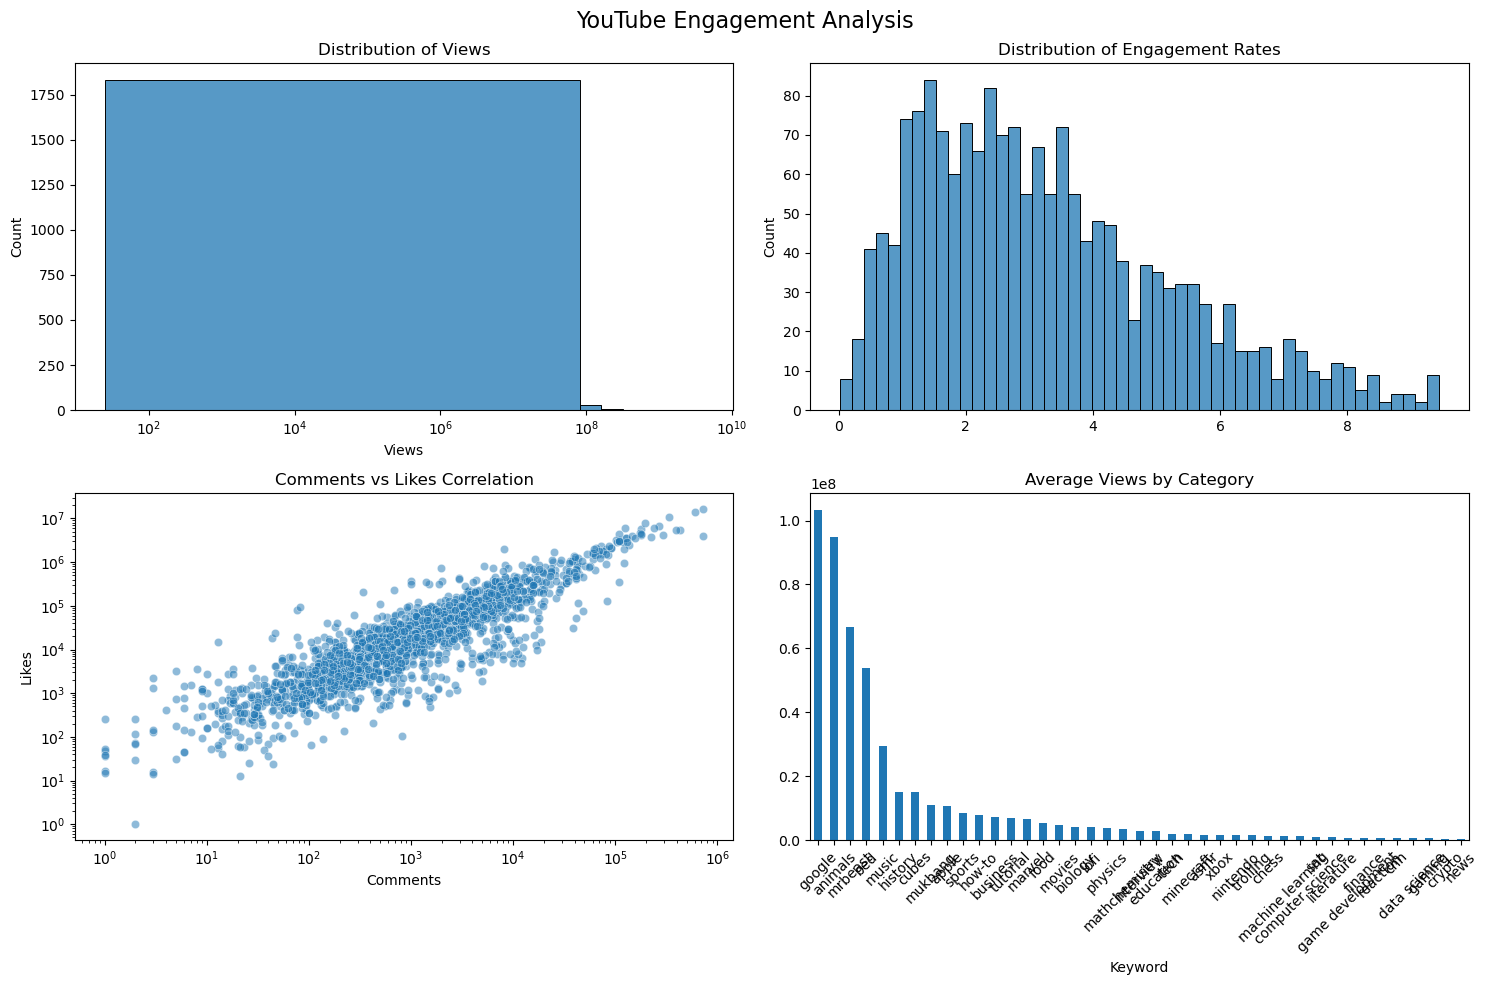

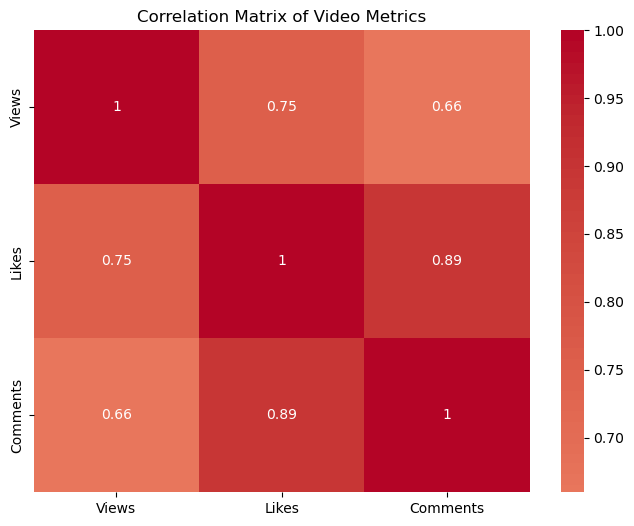

In [11]:
def plot_engagement_insights(videos_df):
    """
    Plot key engagement metrics and relationships
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('YouTube Engagement Analysis', fontsize=16)

    # Views Distribution
    sns.histplot(data=videos_df, x='Views', bins=50, ax=axes[0,0])
    axes[0,0].set_title('Distribution of Views')
    axes[0,0].set_xscale('log')

    # Engagement Rate Distribution
    engagement_rate = ((videos_df['Likes'] + videos_df['Comments']) / videos_df['Views'] * 100)
    sns.histplot(data=engagement_rate[engagement_rate < engagement_rate.quantile(0.95)], 
                bins=50, ax=axes[0,1])
    axes[0,1].set_title('Distribution of Engagement Rates')

    # Comments vs Likes Scatter
    sns.scatterplot(data=videos_df, x='Comments', y='Likes', alpha=0.5, ax=axes[1,0])
    axes[1,0].set_title('Comments vs Likes Correlation')
    axes[1,0].set_xscale('log')
    axes[1,0].set_yscale('log')

    # Category Performance (if available)
    if 'Keyword' in videos_df.columns:
        avg_views = videos_df.groupby('Keyword')['Views'].mean().sort_values(ascending=False)
        avg_views.plot(kind='bar', ax=axes[1,1])
        axes[1,1].set_title('Average Views by Category')
        axes[1,1].tick_params(axis='x', rotation=45)
    else:
        axes[1,1].remove()

    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(videos_df):
    """
    Plot correlation matrix of key metrics
    """
    # Select relevant numeric columns
    numeric_cols = ['Views', 'Likes', 'Comments']
    corr_matrix = videos_df[numeric_cols].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Video Metrics')
    plt.show()

# Usage example:
# After your data cleaning
plot_engagement_insights(clean_videos_df)
plot_correlation_matrix(clean_videos_df)

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_upload_day_month_vs_engagement(clean_videos_df):
    """
    Plot upload day/month vs engagement based on the cleaned videos dataset.
    
    Args:
    clean_videos_df (DataFrame): Cleaned videos dataframe with 'Published At', 
                                 'Views', 'Likes', 'Comments'.
    """
    # Create day and month columns
    clean_videos_df['Upload Day'] = clean_videos_df['Published At'].dt.day_name()
    clean_videos_df['Upload Month'] = clean_videos_df['Published At'].dt.month_name()
    
    # Calculate engagement rate (e.g., (Likes + Comments) / Views)
    clean_videos_df['Engagement Rate'] = (clean_videos_df['Likes'] + clean_videos_df['Comments']) / clean_videos_df['Views']
    
    # Aggregate data by day and month
    day_group = clean_videos_df.groupby('Upload Day')['Engagement Rate'].mean().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])
    month_group = clean_videos_df.groupby('Upload Month')['Engagement Rate'].mean().reindex([
        'January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'October', 'November', 'December'
    ])
    
    # Plot engagement rate by day
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    day_group.plot(kind='bar', color='skyblue')
    plt.title('Engagement Rate by Upload Day')
    plt.xlabel('Day of the Week')
    plt.ylabel('Engagement Rate')
    plt.xticks(rotation=45)
    
    # Plot engagement rate by month
    plt.subplot(1, 2, 2)
    month_group.plot(kind='bar', color='orange')
    plt.title('Engagement Rate by Upload Month')
    plt.xlabel('Month')
    plt.ylabel('Engagement Rate')
    plt.xticks(rotation=45)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

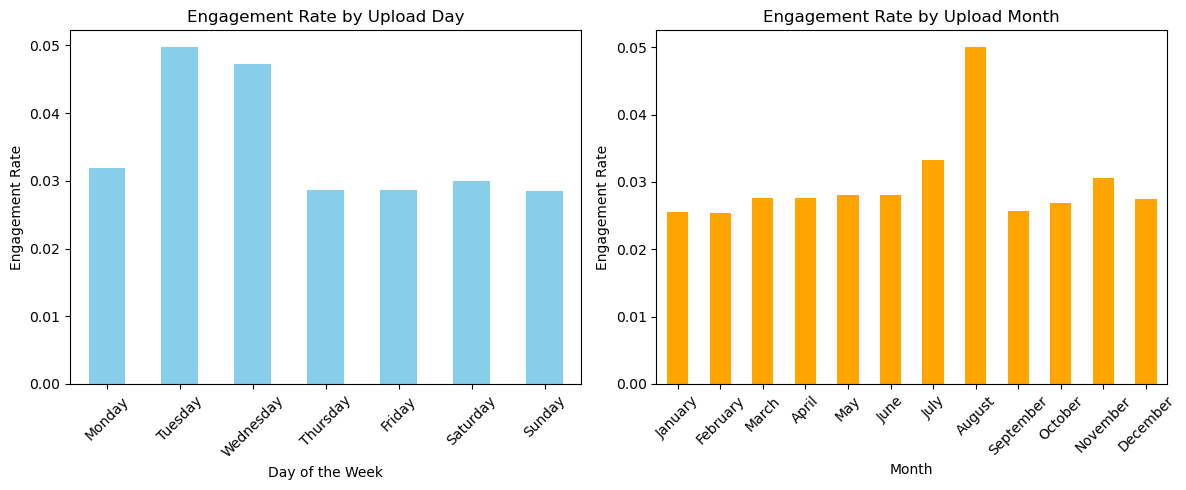

In [13]:
plot_upload_day_month_vs_engagement(clean_videos_df)

# Model Development

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [15]:
class ContentStrategyAnalyzer:
    def __init__(self, videos_df, comments_df):
        self.videos_df = videos_df.copy()
        self.comments_df = comments_df.copy()
        self.sentiment_analyzer = SentimentIntensityAnalyzer()
        self.engagement_model = None
        self.metrics = {}
        self.prepare_date_features()
        
        start_time = time.time()
        self.train_engagement_model()
        end_time = time.time()
        self.training_time = end_time - start_time
        
    def extract_title_features(self, title):
        """Extract features from video title."""
        sentiment_scores = self.sentiment_analyzer.polarity_scores(title)

        return {
            'title_length': len(title),
            'word_count': len(title.split()),
            'has_question': int('?' in title),
            'has_exclamation': int('!' in title),
            'uppercase_ratio': sum(1 for c in title if c.isupper()) / len(title) if title else 0,
            'sentiment_pos': sentiment_scores['pos'],
            'sentiment_neg': sentiment_scores['neg'],
            'sentiment_neu': sentiment_scores['neu'],
            'sentiment_compound': sentiment_scores['compound']
        }
    
    
        
    def prepare_date_features(self):
            """Extract date-based and title-based features."""
            try:
                # Date features
                self.videos_df['Published At'] = pd.to_datetime(self.videos_df['Published At'], errors='coerce')
                self.videos_df['day_of_week'] = self.videos_df['Published At'].dt.dayofweek
                self.videos_df['month'] = self.videos_df['Published At'].dt.month
                self.videos_df['year'] = self.videos_df['Published At'].dt.year

                # Title features
                title_features = self.videos_df['Title'].apply(self.extract_title_features)
                title_features_df = pd.DataFrame(title_features.tolist())

                # Add title features to main dataframe
                for col in title_features_df.columns:
                    self.videos_df[col] = title_features_df[col]
                    
                keyword_dummies = pd.get_dummies(self.videos_df['Keyword'], prefix='keyword')
                self.videos_df = pd.concat([self.videos_df, keyword_dummies], axis=1)

            except Exception as e:
                print(f"Error in preparing features: {e}")

    def train_engagement_model(self):
        """Train and compare different models for engagement prediction."""
        try:
            # Calculate engagement rate
            self.videos_df['engagement_rate'] = np.where(
                self.videos_df['Views'] > 0,
                (self.videos_df['Likes'] + self.videos_df['Comments']) / self.videos_df['Views'] * 100,
                0
            )

            # Handle outliers and infinities
            self.videos_df['engagement_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
            self.videos_df['engagement_rate'].fillna(self.videos_df['engagement_rate'].median(), inplace=True)

            # Handle outliers using IQR
            Q1 = self.videos_df['engagement_rate'].quantile(0.25)
            Q3 = self.videos_df['engagement_rate'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            self.videos_df['engagement_rate'] = self.videos_df['engagement_rate'].clip(lower=lower_bound, upper=upper_bound)

            # Log transform for skewed data
            self.videos_df['engagement_rate'] = np.log1p(self.videos_df['engagement_rate'])

            # Prepare features
            # Get keyword columns (they all start with 'keyword_')
            keyword_columns = [col for col in self.videos_df.columns if col.startswith('keyword_')]

            # Update features list
            features = [
                # Temporal features
                'day_of_week', 'month', 'year',
                # Title features
                'title_length', 'word_count', 'has_question', 'has_exclamation',
                'uppercase_ratio', 'sentiment_pos', 'sentiment_neg', 'sentiment_neu',
                'sentiment_compound',
                # Add keyword features
                *keyword_columns  # This unpacks all keyword columns
            ]

            X = self.videos_df[features]
            y = self.videos_df['engagement_rate']

            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Define models with hyperparameters
            models = {
                'Linear Regression': LinearRegression(),
                'Ridge': Ridge(alpha=1.0),
                'Lasso': Lasso(alpha=0.01),
                'Gradient Boosting': GradientBoostingRegressor(
                    n_estimators=100,
                    learning_rate=0.1,
                    max_depth=3,
                    min_samples_split=5,
                    min_samples_leaf=2,
                    random_state=42
                ),
                'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1)
            }

            model_metrics = {}
            best_r2 = -float('inf')
            best_model = None
            best_model_name = None
            feature_importance = None

            for name, model in models.items():
                print(f"\nTraining {name}...")

                # Train model
                model.fit(X_train_scaled, y_train)

                # Make predictions
                y_pred_train = model.predict(X_train_scaled)
                y_pred_test = model.predict(X_test_scaled)

                # Transform predictions back from log scale
                y_pred_train_original = np.expm1(y_pred_train)
                y_pred_test_original = np.expm1(y_pred_test)
                y_train_original = np.expm1(y_train)
                y_test_original = np.expm1(y_test)

                # Calculate metrics
                metrics = {
                    'train': {
                        'r2': r2_score(y_train_original, y_pred_train_original),
                        'rmse': np.sqrt(mean_squared_error(y_train_original, y_pred_train_original)),
                        'mae': mean_absolute_error(y_train_original, y_pred_train_original)
                    },
                    'test': {
                        'r2': r2_score(y_test_original, y_pred_test_original),
                        'rmse': np.sqrt(mean_squared_error(y_test_original, y_pred_test_original)),
                        'mae': mean_absolute_error(y_test_original, y_pred_test_original)
                    },
                    'cv_scores': cross_val_score(model, X_train_scaled, y_train, cv=5)
                }

                # Get feature importance if available
                if hasattr(model, 'feature_importances_'):
                    feature_importance = pd.DataFrame({
                        'feature': features,
                        'importance': model.feature_importances_
                    }).sort_values('importance', ascending=False)
                elif hasattr(model, 'coef_'):
                    feature_importance = pd.DataFrame({
                        'feature': features,
                        'importance': np.abs(model.coef_)
                    }).sort_values('importance', ascending=False)

                model_metrics[name] = metrics

                # Update best model if current one is better
                if metrics['test']['r2'] > best_r2:
                    best_r2 = metrics['test']['r2']
                    best_model = model
                    best_model_name = name

            self.model_metrics = model_metrics
            self.engagement_model = best_model
            self.best_model_name = best_model_name
            self.scaler = scaler
            self.feature_importance = feature_importance

            # Print comparison
            print("\nModel Comparison:")
            for name, metrics in model_metrics.items():
                print(f"\n{name}:")
                print(f"Train R2: {metrics['train']['r2']:.3f}")
                print(f"Test R2: {metrics['test']['r2']:.3f}")
                print(f"Test RMSE: {metrics['test']['rmse']:.3f}")
                print(f"CV Score: {np.mean(metrics['cv_scores']):.3f} (±{np.std(metrics['cv_scores']):.3f})")

            print(f"\nBest Model: {self.best_model_name}")
            print(f"Best Test R2: {best_r2:.3f}")

            if self.feature_importance is not None:
                print("\nFeature Importance:")
                print(self.feature_importance)

        except Exception as e:
            print(f"Error in training engagement model: {e}")
            raise e  # Re-raise the exception to see the full traceback

    def plot_model_performance(self):
        """Plot model validation results with detailed metrics."""
        try:
            # Font size variables
            title_font_size = 18
            axis_label_font_size = 14
            tick_label_font_size = 12
            heatmap_annotation_font_size = 10

            # Increase figure size
            fig = plt.figure(figsize=(24, 24))

            # First row: Feature Importance takes up the entire row
            plt.subplot(3, 1, 1)
            if hasattr(self, 'feature_importance') and self.feature_importance is not None:
                sns.barplot(data=self.feature_importance, x='importance', y='feature')
                plt.title(f'Feature Importance ({self.best_model_name})', fontsize=title_font_size)
                plt.xlabel('Importance', fontsize=axis_label_font_size)
                plt.ylabel('Feature', fontsize=axis_label_font_size)
                plt.xticks(fontsize=tick_label_font_size)
                plt.yticks(fontsize=tick_label_font_size)
            else:
                plt.text(0.5, 0.5, 'Feature importance not available', ha='center', va='center', fontsize=title_font_size)

            # Second row: Original plots
            # Engagement Rate Distribution
            plt.subplot(3, 3, 4)  # Second row, first column
            sns.histplot(data=np.expm1(self.videos_df['engagement_rate']), bins=30)
            plt.title('Engagement Rate Distribution', fontsize=title_font_size)
            plt.xlabel('Engagement Rate', fontsize=axis_label_font_size)
            plt.ylabel('Frequency', fontsize=axis_label_font_size)
            plt.xticks(fontsize=tick_label_font_size)
            plt.yticks(fontsize=tick_label_font_size)

            # Cross-validation Scores Comparison
            plt.subplot(3, 3, 5)  # Second row, second column
            cv_data = []
            for model_name, metrics in self.model_metrics.items():
                for score in metrics['cv_scores']:
                    cv_data.append({'Model': model_name, 'CV Score': score})

            cv_df = pd.DataFrame(cv_data)
            sns.boxplot(data=cv_df, x='Model', y='CV Score')
            plt.title('Cross-validation Scores by Model', fontsize=title_font_size)
            plt.xlabel('Model', fontsize=axis_label_font_size)
            plt.ylabel('CV Score', fontsize=axis_label_font_size)
            plt.xticks(fontsize=tick_label_font_size, rotation=45)
            plt.yticks(fontsize=tick_label_font_size)

            # Third row: Detailed Model Comparison
            plt.subplot(3, 3, 7)  # Third row, first column
            comparison_data = []
            for model_name, metrics in self.model_metrics.items():
                comparison_data.extend([
                    {'Model': model_name, 'Metric': 'R² (Train)', 'Value': metrics['train']['r2']},
                    {'Model': model_name, 'Metric': 'R² (Test)', 'Value': metrics['test']['r2']},
                    {'Model': model_name, 'Metric': 'RMSE (Train)', 'Value': metrics['train']['rmse']},
                    {'Model': model_name, 'Metric': 'RMSE (Test)', 'Value': metrics['test']['rmse']}
                ])

            comparison_df = pd.DataFrame(comparison_data)
            sns.barplot(data=comparison_df, x='Model', y='Value', hue='Metric')
            plt.title('Model Performance Metrics Comparison', fontsize=title_font_size)
            plt.xlabel('Model', fontsize=axis_label_font_size)
            plt.ylabel('Value', fontsize=axis_label_font_size)
            plt.xticks(fontsize=tick_label_font_size, rotation=45)
            plt.yticks(fontsize=tick_label_font_size)

            # Third row continued: Comprehensive Model Comparison
            plt.subplot(3, 3, 8)  # Third row, second column
            model_summary = pd.DataFrame({
                'Model': list(self.model_metrics.keys()),
                'Train R²': [m['train']['r2'] for m in self.model_metrics.values()],
                'Test R²': [m['test']['r2'] for m in self.model_metrics.values()],
                'Train RMSE': [m['train']['rmse'] for m in self.model_metrics.values()],
                'Test RMSE': [m['test']['rmse'] for m in self.model_metrics.values()],
                'CV Score Mean': [np.mean(m['cv_scores']) for m in self.model_metrics.values()],
                'CV Score Std': [np.std(m['cv_scores']) for m in self.model_metrics.values()]
            }).set_index('Model')

            sns.heatmap(model_summary, annot=True, fmt='.3f', cmap='YlOrRd', center=0.5, vmin=0, vmax=1, 
                        annot_kws={"size": heatmap_annotation_font_size})
            plt.title('Comprehensive Model Comparison', fontsize=title_font_size)
            plt.xticks(fontsize=tick_label_font_size, rotation=45)
            plt.yticks(fontsize=tick_label_font_size)

            # Add summary text for best model
            best_metrics = self.model_metrics[self.best_model_name]
            summary_text = f"""
            Best Model: {self.best_model_name}
            Best Model Performance:
            Train R² = {best_metrics['train']['r2']:.3f}
            Test R² = {best_metrics['test']['r2']:.3f}
            Train RMSE = {best_metrics['train']['rmse']:.3f}
            Test RMSE = {best_metrics['test']['rmse']:.3f}
            CV Score = {np.mean(best_metrics['cv_scores']):.3f} (±{np.std(best_metrics['cv_scores']):.3f})
            Training time: {self.training_time:.2f} seconds
            """
            plt.figtext(0.02, 0.02, summary_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

            plt.tight_layout()
            plt.show()

            # Print detailed model comparison table
            print("\nDetailed Model Comparison:")
            comparison_table = model_summary.round(3)
            comparison_table['Best'] = comparison_table.index == self.best_model_name
            print(comparison_table)

        except Exception as e:
            print(f"Error in plotting model performance: {e}")
            import traceback
            print(traceback.format_exc())
    def predict_engagement(self, title, publish_date):
        """Predict engagement using date and title features."""
        try:
            # Extract title features
            title_features = self.extract_title_features(title)

            # Create features dictionary
            features_dict = {
                'day_of_week': [publish_date.weekday()],
                'month': [publish_date.month],
                'year': [publish_date.year],
                **{k: [v] for k, v in title_features.items()}
            }

            # Convert to DataFrame
            features = pd.DataFrame(features_dict)

            # Scale features and predict
            features_scaled = self.scaler.transform(features)
            predicted_engagement = self.engagement_model.predict(features_scaled)[0]

            # Transform back from log scale
            predicted_engagement = np.expm1(predicted_engagement)

            return {
                'predicted_engagement': predicted_engagement,
                'title_analysis': {
                    **title_features,
                    'sentiment_explanation': "Negative sentiment detected." if title_features['sentiment_neg'] > 0.2 else "No significant negative sentiment."
                },
                'timing': {
                    'day': publish_date.strftime('%A'),
                    'month': publish_date.strftime('%B'),
                    'year': publish_date.year
                }
            }
        except Exception as e:
            print(f"Error in predicting engagement: {e}")
            return None

    def plot_engagement_by(self, groupby_col, title, labels, subplot_position):
        """Helper function to plot engagement by a specified column."""
        try:
            engagement = self.videos_df.groupby(groupby_col)['engagement_rate'].mean()
            plt.subplot(subplot_position)
            sns.barplot(x=engagement.index, y=engagement.values)
            plt.title(title)
            plt.xticks(range(len(labels)), labels)
        except Exception as e:
            print(f"Error in plotting engagement: {e}")

    def plot_timing_analysis(self):
        """Plot engagement patterns by date components."""
        plt.figure(figsize=(15, 5))

        self.plot_engagement_by('day_of_week', 'Average Engagement by Day',
                              ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 131)
        self.plot_engagement_by('month', 'Average Engagement by Month',
                              ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 132)
        self.plot_engagement_by('year', 'Average Engagement by Year',
                              sorted(self.videos_df['year'].unique()), 133)

        plt.tight_layout()
        plt.show()

    def predict_and_visualize(self, title, publish_date):
        """Make prediction and create visualizations for the input."""
        prediction_results = self.predict_engagement(title, publish_date)
        if not prediction_results:
            return

        plt.figure(figsize=(15, 5))

        # Predicted engagement vs distribution
        plt.subplot(131)
        sns.histplot(data=self.videos_df, x='engagement_rate', bins=30)
        plt.axvline(prediction_results['predicted_engagement'], color='r', linestyle='--',
                   label=f'Prediction: {prediction_results["predicted_engagement"]:.2f}%')
        plt.title('Predicted Engagement vs Distribution')
        plt.legend()

        # Day of week comparison
        self.plot_engagement_by('day_of_week', 'Your Upload Day vs Average Engagement',
                              ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 132)
        plt.axvline(publish_date.weekday(), color='r', linestyle='--',
                   label=f'Your day: {publish_date.strftime("%A")}')
        plt.legend()

        # Month comparison
        self.plot_engagement_by('month', 'Your Upload Month vs Average Engagement',
                              ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 133)
        plt.axvline(publish_date.month - 1, color='r', linestyle='--',
                   label=f'Your month: {publish_date.strftime("%B")}')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Test Results


Training Linear Regression...

Training Ridge...

Training Lasso...

Training Gradient Boosting...

Training SVR...

Model Comparison:

Linear Regression:
Train R2: 0.411
Test R2: 0.404
Test RMSE: 1.750
CV Score: 0.419 (±0.020)

Ridge:
Train R2: 0.411
Test R2: 0.404
Test RMSE: 1.751
CV Score: 0.419 (±0.020)

Lasso:
Train R2: 0.388
Test R2: 0.384
Test RMSE: 1.780
CV Score: 0.417 (±0.013)

Gradient Boosting:
Train R2: 0.511
Test R2: 0.404
Test RMSE: 1.751
CV Score: 0.434 (±0.022)

SVR:
Train R2: 0.573
Test R2: 0.432
Test RMSE: 1.709
CV Score: 0.414 (±0.038)

Best Model: SVR
Best Test R2: 0.432

Feature Importance:
                     feature  importance
2                       year    0.204034
39            keyword_movies    0.081261
7            uppercase_ratio    0.071422
1                      month    0.067791
48            keyword_sports    0.057407
21            keyword_crypto    0.056743
0                day_of_week    0.053296
12           keyword_animals    0.049342
43        

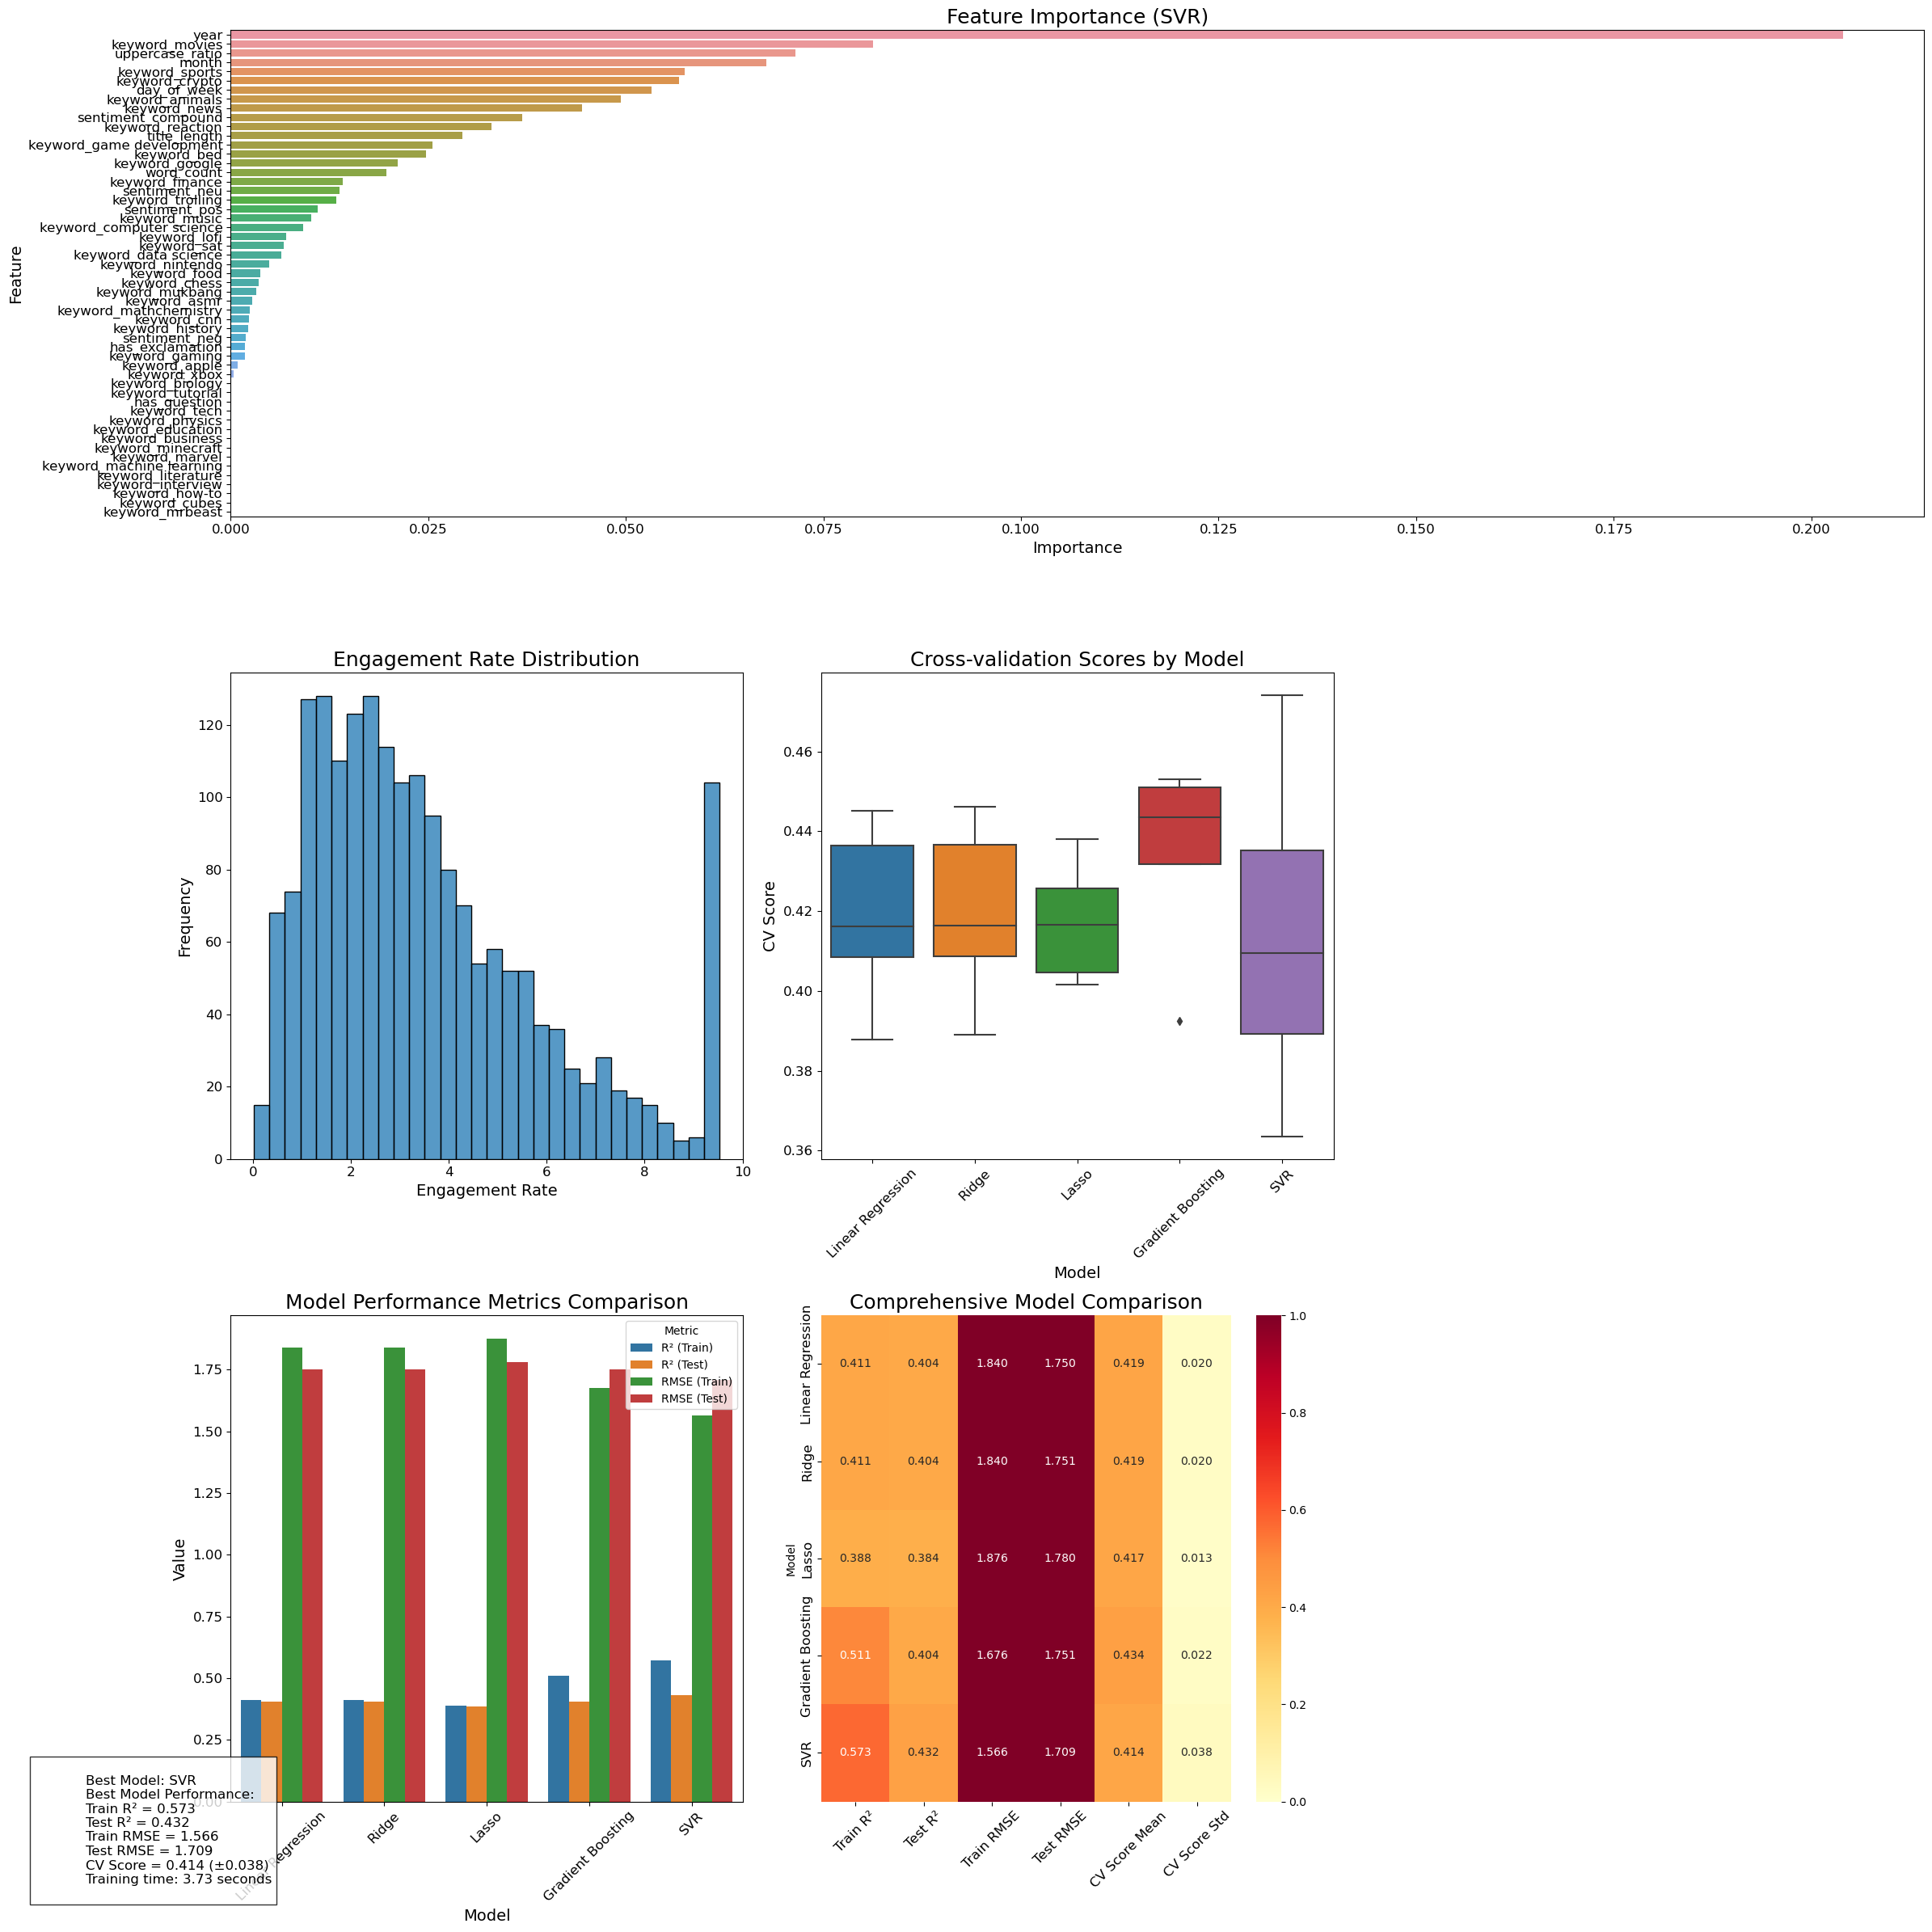


Detailed Model Comparison:
                   Train R²  Test R²  Train RMSE  Test RMSE  CV Score Mean  \
Model                                                                        
Linear Regression     0.411    0.404       1.840      1.750          0.419   
Ridge                 0.411    0.404       1.840      1.751          0.419   
Lasso                 0.388    0.384       1.876      1.780          0.417   
Gradient Boosting     0.511    0.404       1.676      1.751          0.434   
SVR                   0.573    0.432       1.566      1.709          0.414   

                   CV Score Std   Best  
Model                                   
Linear Regression         0.020  False  
Ridge                     0.020  False  
Lasso                     0.013  False  
Gradient Boosting         0.022  False  
SVR                       0.038   True  


In [16]:
import pandas as pd

if __name__ == "__main__":
    # Load datasets
    videos_df = pd.read_csv('archive/videos-stats.csv')
    comments_df = pd.read_csv('archive/comments.csv')

    # Check for necessary columns in videos_df
    required_columns = ['Published At', 'Views', 'Likes', 'Comments']
    if all(col in videos_df.columns for col in required_columns):
        # Initialize the analyzer
        analyzer = ContentStrategyAnalyzer(clean_videos_df, clean_comments_df)  
        
        # Plot model performance
        analyzer.plot_model_performance()
    else:
        print(f"Missing required columns in videos_df. Ensure it includes {required_columns}.")


# Input Test

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

class SimplifiedAnalyzer:
    def __init__(self, videos_df, comments_df):
        """
        Initialize analyzer with required data processing and model training
        """
        self.videos_df = videos_df.copy()
        self.comments_df = comments_df.copy()
        self.sentiment_analyzer = SentimentIntensityAnalyzer()
        self.engagement_model = None
        self.scaler = None
        
        # Prepare data and train model
        self.prepare_data()
        self.train_model()
    
    def get_user_prediction(self):
        """Interactive method to get user input and show prediction."""
        # Get title
        title = input("Enter your video title: ")
        
        # Get date components
        while True:
            try:
                year = int(input("Enter year (YYYY): "))
                month = int(input("Enter month (1-12): "))
                day = int(input("Enter day (1-31): "))
                date = datetime(year, month, day)
                break
            except ValueError:
                print("Invalid date. Please try again.")
        
        # Get keyword
        keyword = input("Enter keyword/category: ")
        
        # Get prediction
        result = self.get_simple_prediction(title, date, keyword)
        
        # Print results
        print("\n=== Analysis Results ===")
        print(f"\nPredicted Engagement Rate: {result['predicted_engagement']}%")
        
        print("\nTitle Analysis:")
        print(f"Length: {result['title_analysis']['length']} characters")
        print(f"Words: {result['title_analysis']['word_count']}")
        print(f"Questions: {result['title_analysis']['has_question_mark']}")
        print(f"Exclamations: {result['title_analysis']['has_exclamation']}")
        print(f"Uppercase: {result['title_analysis']['uppercase_ratio']}")

        print("\nSentiment Analysis:")
        print(f"Positive: {result['title_analysis']['sentiment']['positive']}")
        print(f"Negative: {result['title_analysis']['sentiment']['negative']}")
        print(f"Neutral: {result['title_analysis']['sentiment']['neutral']}")
        print(f"Overall Score: {result['title_analysis']['sentiment']['overall']}")
        print(f"Summary: {result['title_analysis']['sentiment']['explanation']}")
        
        return result

    def get_negative_words(self, text):
        """Identify words with negative sentiment."""
        words = text.split()
        negative_words = []
        
        for word in words:
            # Get sentiment for individual word
            score = self.sentiment_analyzer.polarity_scores(word)
            if score['neg'] > 0.2:  # threshold for negative sentiment
                negative_words.append(word)
        
        return negative_words

    def extract_title_features(self, title):
        """Extract features from video title."""
        sentiment_scores = self.sentiment_analyzer.polarity_scores(title)
        negative_words = self.get_negative_words(title)
        
        return {
            'title_length': len(title),
            'word_count': len(title.split()),
            'has_question': int('?' in title),
            'has_exclamation': int('!' in title),
            'uppercase_ratio': sum(1 for c in title if c.isupper()) / len(title) if title else 0,
            'sentiment_pos': sentiment_scores['pos'],
            'sentiment_neg': sentiment_scores['neg'],
            'sentiment_neu': sentiment_scores['neu'],
            'sentiment_compound': sentiment_scores['compound'],
            'negative_words': negative_words
        }
    
    def prepare_data(self):
        """Prepare features for model training"""
        # Convert dates
        self.videos_df['Published At'] = pd.to_datetime(self.videos_df['Published At'])
        
        # Extract date features
        self.videos_df['day_of_week'] = self.videos_df['Published At'].dt.dayofweek
        self.videos_df['month'] = self.videos_df['Published At'].dt.month
        self.videos_df['year'] = self.videos_df['Published At'].dt.year
        
        # Extract title features
        title_features = self.videos_df['Title'].apply(self.extract_title_features)
        title_features_df = pd.DataFrame(title_features.tolist())
        
        # Add title features to main dataframe
        for col in title_features_df.columns:
            self.videos_df[col] = title_features_df[col]
        
        # Create keyword dummies
        self.keyword_dummies = pd.get_dummies(self.videos_df['Keyword'], prefix='keyword')
        self.videos_df = pd.concat([self.videos_df, self.keyword_dummies], axis=1)
    
    def train_model(self):
        """Train the engagement prediction model"""
        # Calculate engagement rate
        self.videos_df['engagement_rate'] = np.where(
            self.videos_df['Views'] > 0,
            (self.videos_df['Likes'] + self.videos_df['Comments']) / self.videos_df['Views'] * 100,
            0
        )
        
        # Handle outliers
        Q1 = self.videos_df['engagement_rate'].quantile(0.25)
        Q3 = self.videos_df['engagement_rate'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        self.videos_df['engagement_rate'] = self.videos_df['engagement_rate'].clip(lower=lower_bound, upper=upper_bound)
        
        # Log transform
        self.videos_df['engagement_rate'] = np.log1p(self.videos_df['engagement_rate'])
        
        # Prepare features
        features = [
            'day_of_week', 'month', 'year',
            'title_length', 'word_count', 'has_question', 'has_exclamation',
            'uppercase_ratio', 'sentiment_pos', 'sentiment_neg', 'sentiment_neu',
            'sentiment_compound'
        ]
        
        # Add keyword columns
        keyword_columns = [col for col in self.videos_df.columns if col.startswith('keyword_')]
        features.extend(keyword_columns)
        
        # Split and scale data
        X = self.videos_df[features]
        y = self.videos_df['engagement_rate']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        self.scaler = StandardScaler()
        X_train_scaled = self.scaler.fit_transform(X_train)
        
        # Train model (using GradientBoosting as default)
        self.engagement_model = GradientBoostingRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=3,
            random_state=42
        )
        self.engagement_model.fit(X_train_scaled, y_train)
        
        # Store feature names for prediction
        self.feature_names = features
        
        
    def plot_engagement_patterns(self, input_date):
        """
        Plot upload day/month vs engagement with indicators for input date.
        """
        # Create day and month columns
        self.videos_df['Upload Day'] = self.videos_df['Published At'].dt.day_name()
        self.videos_df['Upload Month'] = self.videos_df['Published At'].dt.month_name()
        
        # Calculate raw engagement rate for visualization
        self.videos_df['Visual Engagement Rate'] = (self.videos_df['Likes'] + self.videos_df['Comments']) / self.videos_df['Views']
        
        # Get input date info
        input_day = input_date.strftime('%A')
        input_month = input_date.strftime('%B')
        
        # Aggregate data
        day_group = self.videos_df.groupby('Upload Day')['Visual Engagement Rate'].mean().reindex([
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
        ])
        month_group = self.videos_df.groupby('Upload Month')['Visual Engagement Rate'].mean().reindex([
            'January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'October', 'November', 'December'
        ])
        
        # Create figure
        plt.figure(figsize=(15, 6))
        
        # Plot engagement rate by day
        plt.subplot(1, 2, 1)
        day_group.plot(kind='bar', color='skyblue')
        plt.title('Engagement Rate by Upload Day\nwith Your Upload Day Highlighted', pad=20)
        plt.xlabel('Day of the Week')
        plt.ylabel('Engagement Rate')
        plt.xticks(rotation=45)
        
        # Add vertical line for input day
        day_index = list(day_group.index).index(input_day)
        plt.axvline(x=day_index, color='red', linestyle='--', alpha=0.7)
        
        # Add annotation for input day
        max_height = day_group.max() * 1.1
        plt.text(day_index, max_height, 'Your Upload Day', 
                rotation=0, ha='center', va='bottom',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        
        # Plot engagement rate by month
        plt.subplot(1, 2, 2)
        month_group.plot(kind='bar', color='orange')
        plt.title('Engagement Rate by Upload Month\nwith Your Upload Month Highlighted', pad=20)
        plt.xlabel('Month')
        plt.ylabel('Engagement Rate')
        plt.xticks(rotation=45)
        
        # Add vertical line for input month
        month_index = list(month_group.index).index(input_month)
        plt.axvline(x=month_index, color='red', linestyle='--', alpha=0.7)
        
        # Add annotation for input month
        max_height = month_group.max() * 1.1
        plt.text(month_index, max_height, 'Your Upload Month', 
                rotation=0, ha='center', va='bottom',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        
        plt.tight_layout()
        plt.show()
        
        return {
            'day_rate': day_group[input_day],
            'month_rate': month_group[input_month],
            'day_average': day_group.mean(),
            'month_average': month_group.mean()
        }

    def get_user_prediction(self):
        """Interactive method to get user input and show prediction."""
        # Get title
        title = input("Enter your video title: ")
        
        # Get date components
        while True:
            try:
                year = int(input("Enter year (YYYY): "))
                month = int(input("Enter month (1-12): "))
                day = int(input("Enter day (1-31): "))
                date = datetime(year, month, day)
                break
            except ValueError:
                print("Invalid date. Please try again.")
        
        # Get keyword
        keyword = input("Enter keyword/category: ")
        
        # Get prediction
        result = self.get_simple_prediction(title, date, keyword)
        
        # Print results
        print("\n=== Analysis Results ===")
        print(f"\nPredicted Engagement Rate: {result['predicted_engagement']}%")
        
        print("\nTitle Analysis:")
        print(f"Length: {result['title_analysis']['length']} characters")
        print(f"Words: {result['title_analysis']['word_count']}")
        print(f"Questions: {result['title_analysis']['has_question_mark']}")
        print(f"Exclamations: {result['title_analysis']['has_exclamation']}")
        print(f"Uppercase: {result['title_analysis']['uppercase_ratio']}")

        print("\nSentiment Analysis:")
        print(f"Positive: {result['title_analysis']['sentiment']['positive']}")
        print(f"Negative: {result['title_analysis']['sentiment']['negative']}")
        print(f"Neutral: {result['title_analysis']['sentiment']['neutral']}")
        print(f"Overall Score: {result['title_analysis']['sentiment']['overall']}")
        print(f"Summary: {result['title_analysis']['sentiment']['explanation']}")
        
        # Plot engagement patterns
        print("\nGenerating engagement patterns visualization...")
        engagement_patterns = self.plot_engagement_patterns(date)
        
        # Print timing insights
        print("\nTiming Analysis:")
        print(f"Average engagement rate for {date.strftime('%A')}s: {engagement_patterns['day_rate']:.4f}")
        print(f"Average engagement rate for {date.strftime('%B')}: {engagement_patterns['month_rate']:.4f}")
        print(f"Overall daily average: {engagement_patterns['day_average']:.4f}")
        print(f"Overall monthly average: {engagement_patterns['month_average']:.4f}")
        
        return result
    
    def get_simple_prediction(self, title, date, keyword):
        """
        Get simplified prediction showing only engagement rate and sentiment
        
        Parameters:
        title: str
            Video title
        date: datetime
            Publication date
        keyword: str
            Video keyword/category
            
        Returns:
        dict with predicted engagement and sentiment analysis
        """
        # Extract title features
        title_features = self.extract_title_features(title)
        
        # Create features dictionary
        features_dict = {
            'day_of_week': date.weekday(),
            'month': date.month,
            'year': date.year,
            **title_features
        }
        
        # Add keyword features (with 0s for all keywords except the input keyword)
        for col in [c for c in self.feature_names if c.startswith('keyword_')]:
            features_dict[col] = 1 if f'keyword_{keyword}' == col else 0
        
        # Convert to DataFrame
        features = pd.DataFrame([features_dict])
        
        # Select and order features to match training data
        features = features[self.feature_names]
        
        # Scale features
        features_scaled = self.scaler.transform(features)
        
        # Predict
        predicted_engagement = self.engagement_model.predict(features_scaled)[0]
        predicted_engagement = np.expm1(predicted_engagement)
        
        # Return detailed output
        return {
            'predicted_engagement': round(predicted_engagement, 2),
            'title_analysis': {
                'length': title_features['title_length'],
                'word_count': title_features['word_count'],
                'has_question_mark': "Question mark detected" if title_features['has_question'] else "No question mark",
                'has_exclamation': "Exclamation mark detected" if title_features['has_exclamation'] else "No exclamation mark",
                'uppercase_ratio': f"{title_features['uppercase_ratio']*100:.1f}% uppercase letters",
                'sentiment': {
                    'positive': f"{title_features['sentiment_pos']*100:.1f}%",
                    'negative': f"{title_features['sentiment_neg']*100:.1f}%",
                    'neutral': f"{title_features['sentiment_neu']*100:.1f}%",
                    'overall': title_features['sentiment_compound'],
                    'explanation': f"Negative sentiment detected in words: {', '.join(title_features['negative_words'])}" if title_features['negative_words'] else "No significant negative sentiment."
                }
            }
        }

Enter your video title: Mr Beast Challenge Gone WRONG!?
Enter year (YYYY): 2024
Enter month (1-12): 12
Enter day (1-31): 25
Enter keyword/category: mrbeast

=== Analysis Results ===

Predicted Engagement Rate: 4.29%

Title Analysis:
Length: 31 characters
Words: 5
Questions: Question mark detected
Exclamations: Exclamation mark detected
Uppercase: 29.0% uppercase letters

Sentiment Analysis:
Positive: 15.4%
Negative: 49.0%
Neutral: 35.6%
Overall Score: -0.5893
Summary: Negative sentiment detected in words: WRONG!?

Generating engagement patterns visualization...


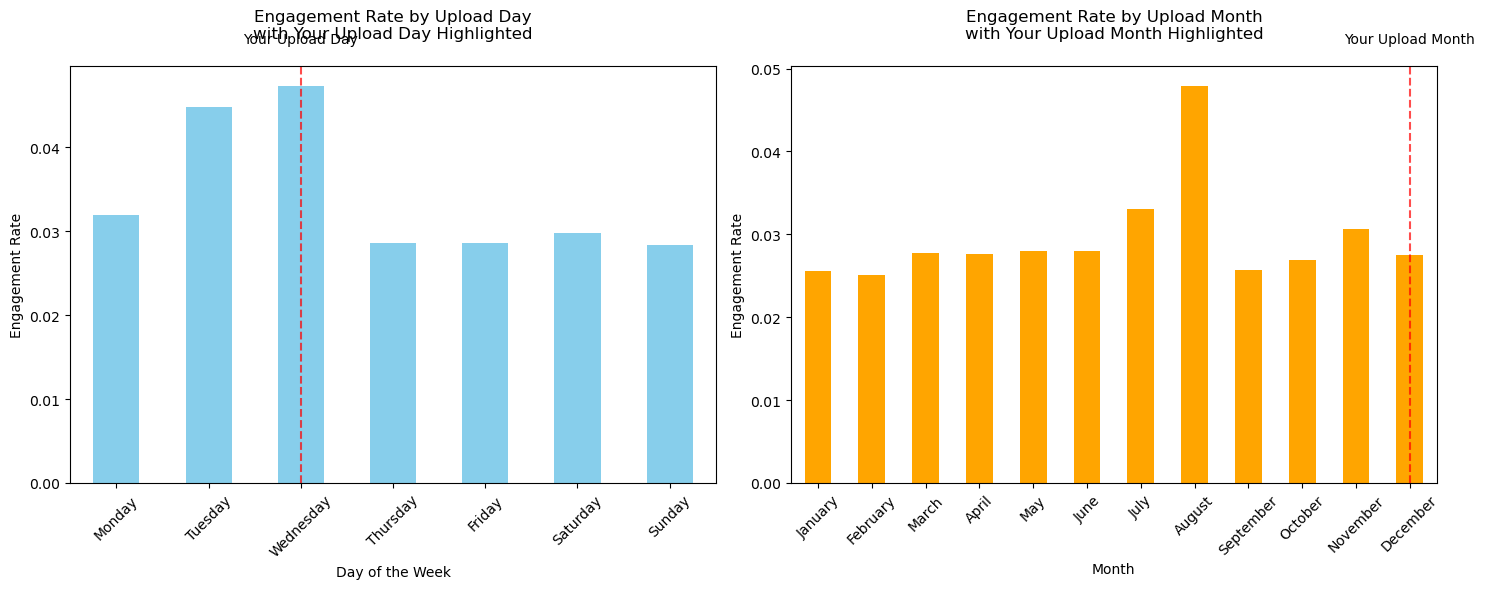


Timing Analysis:
Average engagement rate for Wednesdays: 0.0473
Average engagement rate for December: 0.0275
Overall daily average: 0.0342
Overall monthly average: 0.0295


{'predicted_engagement': 4.29,
 'title_analysis': {'length': 31,
  'word_count': 5,
  'has_question_mark': 'Question mark detected',
  'has_exclamation': 'Exclamation mark detected',
  'uppercase_ratio': '29.0% uppercase letters',
  'sentiment': {'positive': '15.4%',
   'negative': '49.0%',
   'neutral': '35.6%',
   'overall': -0.5893,
   'explanation': 'Negative sentiment detected in words: WRONG!?'}}}

In [20]:
# Create the analyzer
analyzer = SimplifiedAnalyzer(videos_df, comments_df)

# Get prediction with visualization
analyzer.get_user_prediction()